<a href="https://colab.research.google.com/github/kgpark88/bigdata/blob/main/code/ai_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  데이터 로드
 - 데이터 출처 : https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction

In [1]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import warnings

# 경고 메시지를 무시하도록 설정하기
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_csv('Invistico_Airline.csv')
df = pd.read_csv('https://raw.githubusercontent.com/kgpark88/bigdata/main/code/Invistico_Airline.csv')

### 데이터 전처리하기

#### ■ 결측치 처리하기

In [3]:
# SimpleImputer 객체로 결측치 대체하기
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df["Arrival Delay in Minutes"] = mean_imputer.fit_transform(df[["Arrival Delay in Minutes"]])

#### ■ 데이터 인코딩

In [4]:
# object 컬럼 타입을 string 타입으로 변경하기
cols = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
df[cols] = df[cols].astype(str)

In [5]:
# 범주형 데이터를 수치값으로 변경하기
df['satisfaction'].replace(['dissatisfied','satisfied'], [0,1], inplace=True)

In [6]:
# 순서형 인코딩(Ordinal Encoding)하기
categories = pd.Categorical(
    df['Class'],
    categories= ['Eco', 'Eco Plus', 'Business'],
    ordered=True)
labels, unique = pd.factorize(categories, sort=True)
df['Class'] = labels

In [7]:
# 원핫 인코딩(One Hot Encoding)하기
cat_cols = ['Gender','Customer Type','Type of Travel']
df = pd.get_dummies(df, columns=cat_cols)

In [8]:
# 데이터 전처리 결과 확인하기
df.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,0,265,0,0,0,2,2,4,...,3,2,0,0.0,1,0,1,0,0,1
1,1,47,2,2464,0,0,0,3,0,2,...,3,2,310,305.0,0,1,1,0,0,1
2,1,15,0,2138,0,0,0,3,2,0,...,4,2,0,0.0,1,0,1,0,0,1
3,1,60,0,623,0,0,0,3,3,4,...,1,3,0,0.0,1,0,1,0,0,1
4,1,70,0,354,0,0,0,3,4,3,...,2,5,0,0.0,1,0,1,0,0,1


In [9]:
# 데이터 타입 확인하기
df.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Female                          uint8
Gender_Male                            uint8
Customer T

#### ■ 데이터셋 분리하기

In [10]:
from sklearn.model_selection import train_test_split

# 데이터셋을 입력(X)과 레이블(y)로 분리하기
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction'].reset_index(drop=True)

# 테스트 데이터셋(test data)로 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.15,
    random_state=2023,
    stratify=y)

# 훈련 데이터(train data)와 검증 데이터(validation data) 분리하기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=0.2,
    random_state=2023,
    stratify=y_train)

print(f'훈련 데이터셋 크기 : X_train {X_train.shape}, y_train {y_train.shape}')
print(f'검증 데이터셋 크기 : X_val {X_val.shape}, y_val {y_val.shape}')
print(f'테스트 데이터셋 크기 : X_val {X_test.shape}, y_val {y_test.shape}')

훈련 데이터셋 크기 : X_train (88318, 25), y_train (88318,)
검증 데이터셋 크기 : X_val (22080, 25), y_val (22080,)
테스트 데이터셋 크기 : X_val (19482, 25), y_val (19482,)


#### ■ 데이터 스케일링하기

In [11]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화하기
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

print(X_train)

[[0.69230769 0.         0.18098826 ... 0.         0.         1.        ]
 [0.42307692 0.         0.21489639 ... 0.         1.         0.        ]
 [0.42307692 0.         0.26184611 ... 0.         0.         1.        ]
 ...
 [0.73076923 0.         0.33400956 ... 0.         0.         1.        ]
 [0.34615385 1.         0.30024634 ... 1.         1.         0.        ]
 [0.48717949 1.         0.36907695 ... 0.         1.         0.        ]]


### 모델 구성

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

keras.backend.clear_session()

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(25,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

### 모델 학습 환경 설정

In [13]:
# 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법 설정하기
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 모델 학습

In [14]:
# 모델 학습하기
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', mode='min',
                              save_best_only=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=128,
          verbose=1, validation_data=(X_val, y_val), callbacks=[es, mc])

Epoch 1/100
690/690 [==============================] - ETA: 0s - loss: 0.2875 - accuracy: 0.8803
Epoch 1: val_loss improved from inf to 0.20722, saving model to best_model.h5
690/690 [==============================] - 19s 7ms/step - loss: 0.2875 - accuracy: 0.8803 - val_loss: 0.2072 - val_accuracy: 0.9131
Epoch 2/100
684/690 [============================>.] - ETA: 0s - loss: 0.1972 - accuracy: 0.9181
Epoch 2: val_loss improved from 0.20722 to 0.17346, saving model to best_model.h5
690/690 [==============================] - 5s 7ms/step - loss: 0.1971 - accuracy: 0.9181 - val_loss: 0.1735 - val_accuracy: 0.9259
Epoch 3/100
682/690 [============================>.] - ETA: 0s - loss: 0.1728 - accuracy: 0.9269
Epoch 3: val_loss improved from 0.17346 to 0.15295, saving model to best_model.h5
690/690 [==============================] - 4s 5ms/step - loss: 0.1727 - accuracy: 0.9270 - val_loss: 0.1530 - val_accuracy: 0.9305
Epoch 4/100
683/690 [============================>.] - ETA: 0s - loss: 0.

### 모델 훈련 과정 시각화

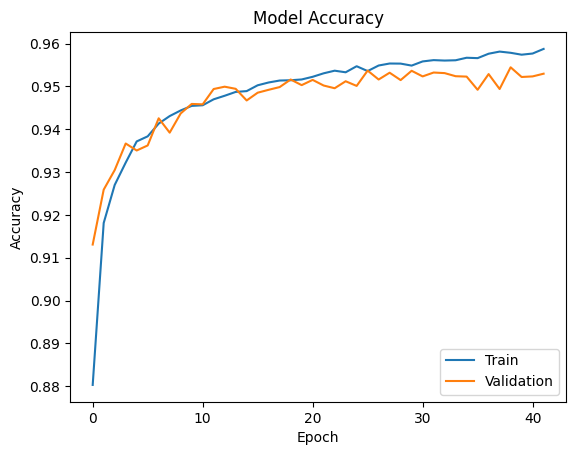

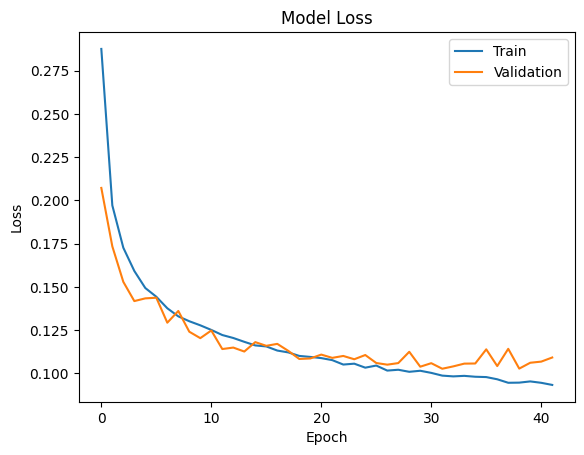

In [15]:
import matplotlib.pyplot as plt

# 모델 accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# 모델 loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### confusion matrix, classification report

In [16]:
def predict_class(y_pred, thresh=0.5):
  return tf.cast(y_pred > thresh, tf.float32)

from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_class = predict_class(y_pred)
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

print(classification_report(y_test, y_pred_class))

609/609 [==============================] - 2s 3ms/step
[[ 8527   292]
 [  555 10108]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8819
           1       0.97      0.95      0.96     10663

    accuracy                           0.96     19482
   macro avg       0.96      0.96      0.96     19482
weighted avg       0.96      0.96      0.96     19482

